In [8]:
import numpy as np
import pandas as pd
import yfinance as yf

import riskfolio as rp

import matplotlib.pyplot as plt

In [9]:
assets = ['AMZN', 'AAPL']

start = '2016-01-01'
end = '2019-12-30'

data = yf.download(assets, 
                   start=start,
                   end=end)

print(data.head())

[*********************100%***********************]  2 of 2 completed

Price           Close                  High                   Low             \
Ticker           AAPL       AMZN       AAPL       AMZN       AAPL       AMZN   
Date                                                                           
2016-01-04  23.834379  31.849501  23.838905  32.886002  23.076476  31.375500   
2016-01-05  23.237106  31.689501  23.947500  32.345501  23.169235  31.382500   
2016-01-06  22.782364  31.632500  23.160186  31.989500  22.594586  31.015499   
2016-01-07  21.820843  30.396999  22.653406  31.500000  21.816319  30.260500   
2016-01-08  21.936226  30.352501  22.422642  31.207001  21.890979  30.299999   

Price            Open                Volume             
Ticker           AAPL       AMZN       AAPL       AMZN  
Date                                                    
2016-01-04  23.214482  32.814499  270597600  186290000  
2016-01-05  23.924876  32.342999  223164000  116452000  
2016-01-06  22.750690  31.100000  273829600  106584000  
2016-01-07  22.32

In [10]:
data = data.loc[:, ('Close')]

ret = data[assets].pct_change().dropna()

port = rp.Portfolio(returns=ret)

method_mu = 'hist'
method_cov = 'hist'

port.assets_stats(method_mu=method_mu, 
                  method_cov=method_cov)

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0.04/12/22
l = 0

w = port.optimization(model=model,
                      rm=rm,
                      obj=obj,
                      rf=rf,
                      l=l,
                      hist=hist)

print(w)

       weights
AMZN  0.379644
AAPL  0.620356


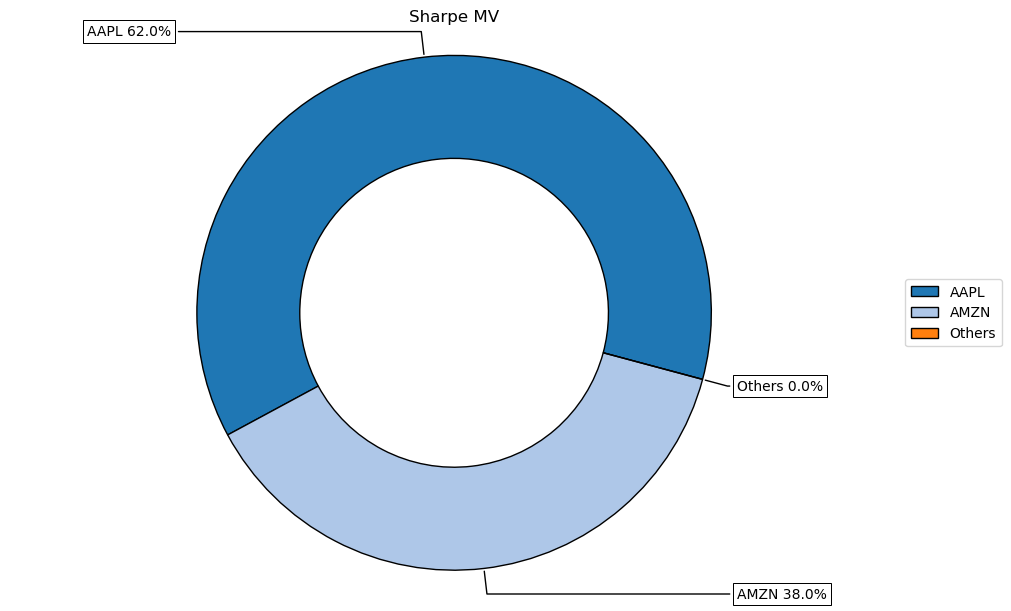

In [11]:
ax1 = rp.plot_pie(w=w, 
                  title='Sharpe MV',
                  others = 0.05,
                  nrow=20,
                  cmap='tab20',
                  height=6,
                  width=10,
                  ax=None)
plt.show()


# Efficient frontier

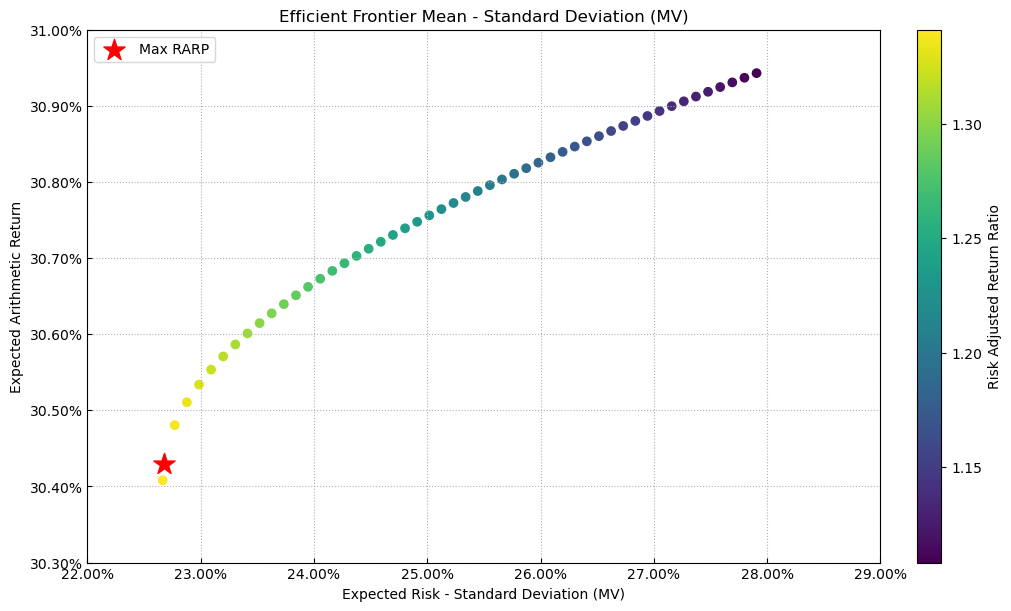

In [7]:
points = 50

frontier = port.efficient_frontier(model=model,
                                   rm=rm,
                                   points=points,
                                   rf=rf,
                                   hist=hist)
label = 'Max RARP'
mu = port.mu
cov = port.cov
returns = port.returns

ax2 = rp.plot_frontier(w_frontier=frontier, 
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       rf=rf,
                       alpha=0.05,
                       cmap='viridis',
                       w=w,
                       label=label,
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       ax=None)